In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import sklearn.preprocessing as preprocessing

df_train = pd.read_csv('adult.data.csv', 
                       names=[
                            "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
                            "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
                            "Hours per week", "Country", "Target"])



In [2]:
def checkData(data):
# delete workclass,education,capital gain,capital loss,country
    figure = pl.figure(figsize=(50,300))

    for i, eachColumn in enumerate(data.columns):
        axData = figure.add_subplot(8,2,i+1)
        axData.set_title(eachColumn)
        for item in ([axData.title, axData.xaxis.label, axData.yaxis.label]+axData.get_xticklabels()+axData.get_yticklabels()):
            item.set_fontsize(40)
        
        if data.dtypes[eachColumn] == np.object:
            data[eachColumn].value_counts().plot(kind="bar", axes=axData)
        else:
            data[eachColumn].hist(axes=axData)
            pl.xticks(rotation="vertical")
    pl.subplots_adjust(hspace=0.7, wspace=0.2)
def deleteUselessColumn(data):
    del data["Workclass"]
    del data["Education"]
    del data["Country"]
    return data
def dataEncode(data):
    encodedData = {}
    data_copy = data.copy()
    for eachColumn in data_copy.columns:
        if data_copy.dtypes[eachColumn] == np.object:
            encodedData[eachColumn] = preprocessing.LabelEncoder()
            data_copy[eachColumn] = encodedData[eachColumn].fit_transform(data_copy[eachColumn])
    return data_copy,encodedData
def checkNaN(data):
    print(np.sum(data.isnull()))
def deleteNaNRow(data):
    data = data.dropna()
    return data
# usage:
# a = deleteUselessColumn(df_train)
# b = deleteNaNRow(a)   
# c= dataEncode(b)

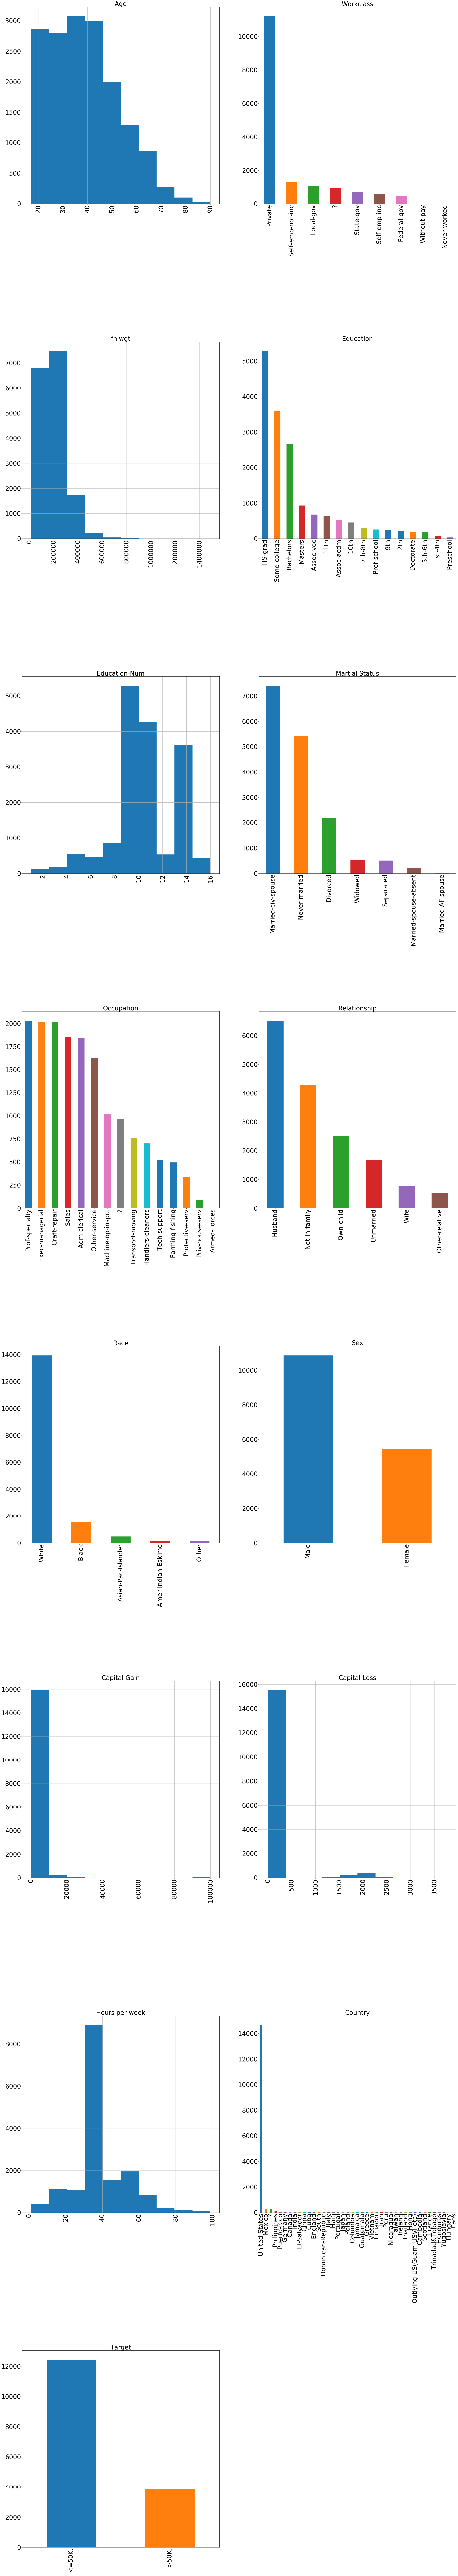

In [3]:
checkData(df_train)
# print(np.sum(df_train=="United-States"))

In [4]:
# checkData(df_train)
# b = deleteUselessColumn(df_train)
# c = deleteUselessColumn(b)
d,f = dataEncode(df_train)
e = preprocessing.scale(d.values)
e = pd.DataFrame(e,columns=[
                            "Age", "Workclass","fnlwgt", "Education","Education-Num", "Marital Status",
                            "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
                            "Hours per week", "Country","Target"])

d.head(5)

C:\Users\anjingwsno1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,38,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,38,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,38,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,38,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,38,0


In [5]:
e.head(5)

# c,d= dataEncode(df_train)

# for i in f:
#     print(i)
#     print(f[i].classes_)

,Age,Workclass,fnlwgt,Education,Education-Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,-0.994129,0.085414,0.353474,-2.387116,-1.196864,0.905239,0.097403,0.981172,-1.990286,0.706521,-0.142662,-0.218062,-0.031432,0.286402,-0.556137
1,-0.055417,0.085414,-0.942391,0.188304,-0.417886,-0.418769,-0.374987,-0.902239,0.389812,0.706521,-0.142662,-0.218062,0.769918,0.286402,-0.556137
2,-0.777503,-1.265356,1.395450,-0.841864,0.750582,-0.418769,1.042181,-0.902239,0.389812,0.706521,-0.142662,-0.218062,-0.031432,0.286402,1.798118
3,0.377835,0.085414,-0.275397,1.218472,-0.028397,-0.418769,0.097403,-0.902239,-1.990286,0.706521,0.871091,-0.218062,-0.031432,0.286402,1.798118
4,-1.499590,-2.616126,-0.812954,1.218472,-0.028397,0.905239,-1.555960,0.981172,0.389812,-1.415387,-0.142662,-0.218062,-0.832781,0.286402,-0.556137


In [6]:
c

NameError: name 'c' is not defined